# Create open Eastern (Southern) boundary condition 

In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
from mpl_toolkits.basemap import Basemap, cm
import cmocean

%matplotlib inline

In [2]:
mask = nc.Dataset('/ocean/brogalla/GEOTRACES/william/ANHA12_mask.nc')

In [3]:
lons = mask.variables['nav_lon']
lats = mask.variables['nav_lat']
depths = mask.variables['nav_lev']

In [4]:
folder = '/ocean/brogalla/GEOTRACES/data/bathymetry/'
file = 'ANHA12_mesh_hgr.nc'

d = nc.Dataset(folder + file)

In [5]:
lon_mesh = d.variables['nav_lon']
lat_mesh = d.variables['nav_lat']
mbathy = d.variables['mbathy']

lat_mesh = np.array(lat_mesh)
lon_mesh = np.array(lon_mesh)

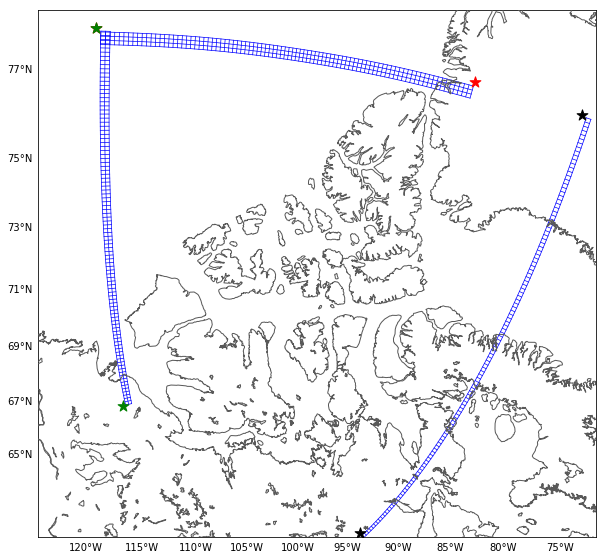

In [6]:
# plot background map of land:
fig,ax = plt.subplots(figsize=(10,10))
proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -98, resolution='i', width=2.7e6, height=2.55e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
#proj.fillcontinents(color=[0.75, 0.75, 0.75], lake_color=None, zorder=2) 
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(lon_mesh, lat_mesh)

d = 5
# Northern (model Eastern) boundary
proj.plot(x[1600:2050:d,779:799:d], y[1600:2050:d,779:799:d], 'b-', lw=0.7)
proj.plot(x[1600:2050:d,779:799:d].T, y[1600:2050:d,779:799:d].T, 'b-', lw=0.7)

# # Southern (model Western) boundary
# proj.plot(x[1480:2050:d,201:221:d], y[1480:2050:d,201:221:d], 'b-', lw=0.7)
# proj.plot(x[1480:2050:d,201:221:d].T, y[1480:2050:d,201:221:d].T, 'b-', lw=0.7)

# Eastern (model Southern) boundary
proj.plot(x[1472:1482:d,182:798:d], y[1472:1482:d,182:798:d], 'b-', lw=0.7)
proj.plot(x[1472:1482:d,182:798:d].T, y[1472:1482:d,182:798:d].T, 'b-', lw=0.7)

# Western (model Northern) boundary
proj.plot(x[2035:2050:d,300:799:d], y[2035:2050:d,300:799:d], 'b-', lw=0.7)
proj.plot(x[2035:2050:d,300:799:d].T, y[2035:2050:d,300:799:d].T, 'b-', lw=0.7)

# CS = proj.plot(x[1480:2050:20,200:800:20], y[1480:2050:20,200:800:20], 'r-', lw=0.7)
# CS = proj.plot(x[1480:2050:20,200:800:20].T, y[1480:2050:20,200:800:20].T, 'r-', lw=0.7)

#southern boundary
x1s_lon = lon_mesh[1482,798]
y1s_lat = lat_mesh[1482,798]
x2s_lon = lon_mesh[1482,182]
y2s_lat = lat_mesh[1482,182]
x1s, y1s = proj(x1s_lon, y1s_lat)
x2s, y2s = proj(x2s_lon, y2s_lat)
#eastern boundary
p2_lon = lon_mesh[2050,799]
p2_lat = lat_mesh[2050,799]
p3_lon = lon_mesh[1600,799]
p3_lat = lat_mesh[1600,799]
x1e, y1e = proj(p2_lon, p2_lat)
x2e, y2e = proj(p3_lon, p3_lat)
#northern boundary
x1n_lon = lon_mesh[2050,300]
y1n_lat = lat_mesh[2050,300]
x2n_lon = lon_mesh[2050,799]
y2n_lat = lat_mesh[2050,799]
x1n, y1n = proj(x1n_lon, y1n_lat)
x2n, y2n = proj(x2n_lon, y2n_lat)
  
proj.scatter(x1e, y1e, marker='*',s=130,zorder=3, c='r')
proj.scatter(x2e, y2e, marker='*',s=130,zorder=3, c='r')
proj.scatter(x1s, y1s, marker='*',s=130,zorder=3, c='k')
proj.scatter(x2s, y2s, marker='*',s=130,zorder=3, c='k')
proj.scatter(x1n, y1n, marker='*',s=130,zorder=3, c='g')
proj.scatter(x2n, y2n, marker='*',s=130,zorder=3, c='g')

## Read in IC file:

In [7]:
inif = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/IC/Mn_ini_20180716.nc')
ini_dMn = inif.variables['dMn']
ini_oMn = inif.variables['oMn']

In [8]:
ini_dMn.shape

(1, 50, 2400, 1632)

/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/brogalla/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


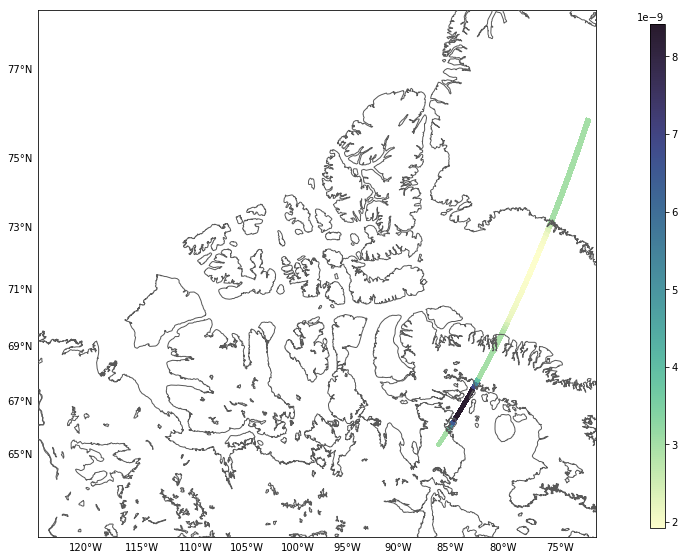

In [9]:
fig,ax = plt.subplots(figsize=(10,10))
proj=Basemap(projection='eqdc',lat_0 = 76, lon_0 = -98, resolution='i', width=2.7e6, height=2.55e6)
proj.drawcoastlines(linestyle='-', color=[0.35, 0.35, 0.35], linewidth=1, zorder=3)
proj.drawparallels(np.arange(int(65),int(90),2),labels=[1,0,0,0], linewidth=0.0)
proj.drawmeridians(np.arange(int(-140),int(-30),5),labels=[0,0,0,1], linewidth=0.0)

x, y = proj(lon_mesh, lat_mesh)

d = 5

# Eastern (model Southern) boundary
# proj.plot(x[1482:1502:d,202:798:d], y[1482:1502:d,202:798:d], 'b-', lw=0.7)
# proj.plot(x[1482:1502:d,202:798:d].T, y[1482:1502:d,202:798:d].T, 'b-', lw=0.7)

x1 = x[1472:1482:d,352:798:d]
y1 = y[1472:1482:d,352:798:d]
z1 = ini_dMn[0,0,1472:1482:d, 352:798:d]

CS1 = proj.pcolor(x1, y1, z1, cmap=cmocean.cm.deep)

cbaxes = fig.add_axes([0.975, 0.15, 0.02, 0.7]) 
CBar = plt.colorbar(CS1, ax=ax, cax=cbaxes)

In [11]:
boundaryE_lats = lats[1482:1492, 181:798]
boundaryE_lons = lons[1482:1492, 181:798]
boundaryE_dMn = ini_dMn[0,:,1482:1492, 181:798]
boundaryE_oMn = ini_oMn[0,:,1482:1492, 181:798]
print(boundaryE_lats.shape)
print(boundaryE_lons.shape)
print(boundaryE_dMn.shape)
print(boundaryE_oMn.shape)

(10, 617)
(10, 617)
(50, 10, 617)
(50, 10, 617)


In [12]:
np.average(boundaryE_dMn[0,:])

2.9073530799990433e-09

In [13]:
# final dimensions should be
rimwidth = 10
len(boundaryE_lats[0,:])*rimwidth

6170

In [14]:
time_dim=1
bound_dimE=len(boundaryE_lats[0,:])

Based on one layer:

In [15]:
# function to stack input for boundaries:
def stack_input(var, time_dim, bound_dim, rimwidth):
    a = var
    b = np.hstack((var,var))
    for i in range(0,rimwidth-2):
        b = np.hstack((b,a))
#     c = np.dstack((b, b))
#     for i in range(0,time_dim-2):
#         c = np.dstack((c, b))
    d = np.moveaxis(b,-1,0)
    return d

In [16]:
# Eastern boundary:
dMnE_O = stack_input(boundaryE_dMn, time_dim, bound_dimE, rimwidth)
oMnE_O = stack_input(boundaryE_oMn, time_dim, bound_dimE, rimwidth)
print(oMnE_O.shape)
print(dMnE_O.shape)

(617, 50, 100)
(617, 50, 100)


Based on rimwidth number of layers:

In [17]:
def flatten_input(var):
    b = var[0,:,:].flatten()
    for i in range(1,len(var)):
        a = var[i,:,:].flatten()
        b = np.vstack((b,a))
    return b

In [18]:
dMnE_O = flatten_input(boundaryE_dMn)
oMnE_O = flatten_input(boundaryE_oMn)
print(dMnE_O.shape)
print(oMnE_O.shape)

(50, 6170)
(50, 6170)


In [19]:
dMn_EOBC = np.reshape(dMnE_O, (1,50,1,bound_dimE*rimwidth))
oMn_EOBC = np.reshape(oMnE_O, (1,50,1,bound_dimE*rimwidth))
print(dMn_EOBC.shape)
print(oMn_EOBC.shape)

(1, 50, 1, 6170)
(1, 50, 1, 6170)


In [20]:
np.average(dMnE_O[:,0])

3.0000000261765077e-09

## Create new NetCDF file

In [21]:
# Load structure from sample dataset:
BZ = mask.dimensions['z']

In [22]:
# Setup the new NetCDF file:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Mn_South_OBC_20190614.nc', 'w', zlib=True)
ncd.createDimension('x', bound_dimE*rimwidth)
ncd.createDimension('y',1)
ncd.createDimension('z',len(BZ))
ncd.createDimension('t',None)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 't', size = 0

In [23]:
dMn = ncd.createVariable('dMn', 'float64', ('t','z','y','x'))
dMn.units = 'dissolv. Mn'
dMn.long_name = 'dMn'
dMn[:] = dMn_EOBC

oMn = ncd.createVariable('oMn', 'float64', ('t','z','y','x'))
oMn.units = 'oxidis. Mn'
oMn.long_name = 'oMn'
oMn[:] = oMn_EOBC

In [24]:
ncd.close()